# Computational Neuroscience UW - week 3 Q1

## Question:

Likelihood ratio test with asymmetric costs

Suppose we have a stimulus defined by a single variable called sss. sss can take one of two values, which we will call s1​ and s2​. You could think of these as lights flashing in the eyes at one of two possible frequencies. Or perhaps listening to punk rock vs. listening to Dvorak.

Let's call the firing rate response of a neuron to this stimulus rrr.

Suppose that under stimulus s1​ the response rate of the neuron can be roughly approximated with a Gaussian distribution with the following parameters:

μ (mean): 5

σ (standard deviation): 0.5

And likewise for s2:

μ: 7

σ: 1

Lets say that ***both stimuli*** are **equally likely** and we are given **no other prior information**.

Now let's throw in another twist. Let's say that we receive a measurement of the neuron's response and want to guess which stimulus was presented, but that to us, **it is twice as bad to mistakenly think it is s2​ than to mistakenly think it is s1​.**

Which of these firing rates would make the best decision threshold for us in determining the value of s given a neuron's firing rate?

Hint: There are several functions available to help you evaluate Gaussian distributions. In Octave and in Matlab's stats toolbox you can use the 'normpdf' function. If you know how to set the problem up, you will be able to try all the answers below to find the one that works best. If you decide to challenge yourself to solve this algebraically instead, you can use the univariate Gaussian PDF, given at the top of this Wikipedia page.

### Reword:

- **"it is twice as bad to mistakenly think it is s2​ than to mistakenly think it is s1​"**<br>
- _"it is twice as likely to get s2​ than s1​"_

therfore ratio: **s2:s1 = 2:1**

therefore <font color=red> P(s2|r)/P(s1|r)** = 2 </font>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [58]:
# Distribution parameters
mu_1 = 5
sigma_1 = 0.5

mu_2 = 7
sigma_2 = 1

# Stimulus priors
prior = [0.5, 0.5]

# Generate the distributions
x = np.arange(5,6,0.01)
r_smin  = 2 * norm.pdf(x,mu_1,sigma_1)
r_splus = norm.pdf(x,mu_2,sigma_2)
r_total = prior[0]*r_smin + prior[1]*r_splus

Text(0.5, 1.0, 'Response probability densities')

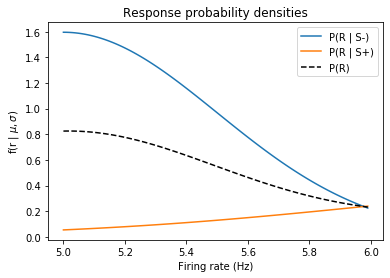

In [59]:
plt.plot(x,r_smin)
plt.plot(x,r_splus)
plt.plot(x,r_total,'--k')
plt.xlabel('Firing rate (Hz)')
plt.ylabel('f(r | $\mu, \sigma$)')
plt.legend(['P(R | S-)','P(R | S+)','P(R)'])
plt.title('Response probability densities')

Text(0.5, 1.0, 'Log-Likelihood ratio')

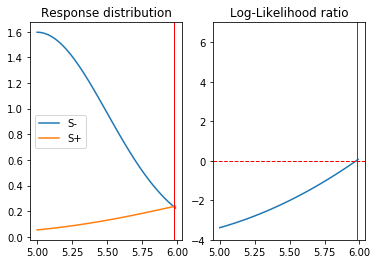

In [60]:
# Calculates the log-likelihood ratio
lr  = np.log(r_splus/r_smin)
lr_0 = np.argmax(lr >= 0)

plt.subplot(121)
plt.plot(x,r_smin)
plt.plot(x,r_splus)
plt.axvline(x[lr_0],linewidth=1,color='r')
plt.legend(['S-','S+'])
plt.title('Response distribution')
plt.subplot(122)
plt.plot(x,lr)
plt.axhline(y=0,linewidth = 1,linestyle='--', color='r')
plt.axvline(x[lr_0],linewidth=1,color='r')
plt.ylim(-4,7)
plt.title('Log-Likelihood ratio')